# 📘 Introduction to Pandas for Data Analysis

Welcome to your first step into the world of data analysis with Python! This notebook is designed for beginners and will guide you through some of the most powerful features of the Pandas library in a 2-hour session.

**Pandas** is a super-useful tool that helps us work with structured data, like tables in a spreadsheet. Think of it as Excel on steroids! 🚀

### 🎯 Learning Objectives for Today:

By the end of this 2-hour session, you will be able to:
1.  **Combine Data**: Learn how to stack and merge different datasets together.
2.  **Group & Aggregate**: Summarize your data to find insights using the `GroupBy` mechanic.
3.  **Bin Data**: Convert numerical data into categories (e.g., 'Low', 'Medium', 'High').
4.  **Visualize Data**: Create simple but powerful plots directly from your data.
5.  **Save Your Work**: Export your cleaned and analyzed data to a CSV file.

Let's get started! Don't be afraid to experiment and change the code. That's the best way to learn.

## 🛠️ Setup: Importing Pandas & Creating Sample Data

First things first, we need to import the `pandas` library. We give it a nickname `pd` to make our code shorter and easier to write. We'll also create the sample datasets we'll use throughout this session, taken directly from our course notes.

In [1]:
# Import the pandas library
import pandas as pd

# --- Sample DataFrame 1: For Merging ---
employees = pd.DataFrame({
    'employee_id': [101, 102, 103, 104],
    'name': ['Alice', 'Bob', 'Charlie', 'David'],
    'department_id': [1, 2, 1, 3]
})

departments = pd.DataFrame({
    'department_id': [1, 2, 4],
    'department_name': ['HR', 'Engineering', 'Marketing']
})

# --- Sample DataFrame 2: For GroupBy, Plotting, and Binning ---
sales_data = pd.DataFrame({
    'Region': ['East', 'West', 'East', 'West', 'East', 'West'],
    'Manager': ['John', 'Anna', 'John', 'Anna', 'John', 'Anna'],
    'Sales': [250, 300, 350, 400, 200, 450],
    'Units': [25, 30, 35, 40, 20, 45]
})

print("✅ Sample DataFrames created successfully!")
print("\n--- Employees ---")
print(employees)
print("\n--- Departments ---")
print(departments)
print("\n--- Sales Data ---")
print(sales_data)

✅ Sample DataFrames created successfully!

--- Employees ---
   employee_id     name  department_id
0          101    Alice              1
1          102      Bob              2
2          103  Charlie              1
3          104    David              3

--- Departments ---
   department_id department_name
0              1              HR
1              2     Engineering
2              4       Marketing

--- Sales Data ---
  Region Manager  Sales  Units
0   East    John    250     25
1   West    Anna    300     30
2   East    John    350     35
3   West    Anna    400     40
4   East    John    200     20
5   West    Anna    450     45


--- 
## Topic 1: Combining Data with `pd.concat()`

📄 **Explanation**

Sometimes, your data is split into multiple files. `pd.concat()` is like stacking sheets of paper on top of each other. It lets you combine DataFrames either vertically (stacking rows, `axis=0`) or horizontally (placing columns side-by-side, `axis=1`).

Most often, you'll use it to append rows from one DataFrame to another.

In [5]:
# Example: Stacking two small DataFrames vertically

# DataFrame with the first set of students
df1 = pd.DataFrame({'name': ['Alice', 'Bob'], 'grade': [85, 90]})
df1

,name,grade
0,Alice,85
1,Bob,90


In [7]:
# DataFrame with more students
df2 = pd.DataFrame({'name': ['Charlie', 'David'], 'grade': [88, 92]})
df2

,name,grade
0,Charlie,88
1,David,92


In [8]:
# Let's concatenate them!
all_students = pd.concat([df1, df2], ignore_index=True) # ignore_index resets the row numbers
print("--- Combined DataFrame ---")
print(all_students)

--- Combined DataFrame ---
      name  grade
0    Alice     85
1      Bob     90
2  Charlie     88
3    David     92


### 🧠 Practice Task: Your Turn to Concatenate!

Create two new DataFrames:
1.  `inventory_A` with columns `product` and `quantity` for 'apples' and 'oranges'.
2.  `inventory_B` with columns `product` and `quantity` for 'bananas' and 'grapes'.

Combine them into a single DataFrame called `full_inventory`.

In [ ]:
# Your code here!
inventory_A = pd.DataFrame({'product': ['apples', 'oranges'], 'quantity': [50, 75]})
inventory_B = pd.DataFrame({'product': ['bananas', 'grapes'], 'quantity': [100, 60]})

# Concatenate them into a new DataFrame called full_inventory
# full_inventory = ...

# Print your result
# print(full_inventory)


--- 
## Topic 2: Smart Combining with `pd.merge()`

📄 **Explanation**

`pd.merge()` is more intelligent than `concat`. It combines DataFrames based on a common column, similar to a VLOOKUP in Excel or a JOIN in SQL. This is essential when you want to enrich one dataset with information from another.

We use the `on` parameter to tell Pandas which column to use as the key, and the `how` parameter to decide what to do with non-matching rows. A `left` join keeps everything from the left DataFrame and only adds matching data from the right.

In [15]:
# Example: Let's find the department name for each employee

# We will merge 'employees' (left) with 'departments' (right)
# The common column is 'department_id'
employee_depts = pd.merge(employees, departments, on='department_id', how='left')

print("--- Merged DataFrame (Left Join) ---")
print(employee_depts)

# 💡 Notice David? His department_id (3) isn't in the departments table, 
# so his department_name is 'NaN' (Not a Number), which means 'missing'.

--- Merged DataFrame (Left Join) ---
   employee_id     name  department_id department_name
0          101    Alice              1              HR
1          102      Bob              2     Engineering
2          103  Charlie              1              HR
3          104    David              3             NaN


### 🧠 Practice Task: The Inner Join

An `inner` join only keeps rows that have a match in **both** DataFrames.

Copy the code from the example above, but change `how='left'` to `how='inner'`. What happens to David in the output? Why?

In [ ]:
# Your code here!
# employee_depts_inner = pd.merge( ... )

# print(employee_depts_inner)

# Write your answer in a comment: 
# David disappears because... 


--- 
## Topic 3: Summarizing Data with `groupby()`

📄 **Explanation**

This is one of the most powerful features in Pandas! It follows a simple **Split-Apply-Combine** strategy:
1.  **Split**: It splits your data into groups based on a category (e.g., all sales for the 'East' region).
2.  **Apply**: It applies a function to each group (e.g., calculate the `sum()` or `mean()` of sales for that group).
3.  **Combine**: It combines the results into a new DataFrame.

This is perfect for answering questions like "What are the total sales per region?" or "What is the average number of units sold by each manager?"

In [16]:
sales_data

,Region,Manager,Sales,Units
0,East,John,250,25
1,West,Anna,300,30
2,East,John,350,35
3,West,Anna,400,40
4,East,John,200,20
5,West,Anna,450,45


In [17]:
# Example 1: Calculate the total sales for each Region

# 1. Split by 'Region', 2. Select the 'Sales' column, 3. Apply sum()
region_sales = sales_data.groupby('Region')['Sales'].sum()

print("--- Total Sales by Region ---")
print(region_sales)

--- Total Sales by Region ---
Region
East     800
West    1150
Name: Sales, dtype: int64


In [18]:
# Example 2: Group by multiple columns and apply multiple functions!

# Get the total Sales and average Units for each Manager in each Region
detailed_summary = sales_data.groupby(['Region', 'Manager']).agg(
    Total_Sales=('Sales', 'sum'),
    Average_Units=('Units', 'mean')
)

print("--- Detailed Summary by Region and Manager ---")
print(detailed_summary)

--- Detailed Summary by Region and Manager ---
                Total_Sales  Average_Units
Region Manager                            
East   John             800      26.666667
West   Anna            1150      38.333333


### 🧠 Practice Task: Manager Performance

Using the `sales_data` DataFrame, find the **average sales** for each `Manager`. 

In [21]:
# Your code here!
# Calculate the average sales per manager
# manager_avg_sales = ...

# Print the result
# print(manager_avg_sales)


--- 
## Topic 4: Discretization and Binning with `pd.cut()`

📄 **Explanation**

Binning is a way to turn continuous numbers (like age or sales figures) into categories. The `pd.cut()` function lets us define the 'bins' or ranges.

This is super useful for feature engineering in AI or just making data easier to understand. For example, instead of looking at exact sales numbers, we can group them into 'Low', 'Medium', and 'High' performance categories.

In [22]:
# Example: Create sales categories based on the 'Sales' column

# 1. Define the edges of our bins
bins = [0, 250, 400, 500]

# 2. Define the names for each bin
labels = ['Low', 'Medium', 'High']

# 3. Create the new 'Sales_Bin' column
sales_data['Sales_Bin'] = pd.cut(sales_data['Sales'], bins=bins, labels=labels, include_lowest=True)

print("--- DataFrame with Binned Sales ---")
print(sales_data)

# 🧪 Try changing the bin numbers or labels and see what happens!

--- DataFrame with Binned Sales ---
  Region Manager  Sales  Units Sales_Bin
0   East    John    250     25       Low
1   West    Anna    300     30    Medium
2   East    John    350     35    Medium
3   West    Anna    400     40    Medium
4   East    John    200     20       Low
5   West    Anna    450     45      High


### 🧠 Practice Task: Categorize Units

Create a new column in `sales_data` called `Unit_Size`. Use `pd.cut` to categorize the `Units` column into two groups: 'Small' (0-30 units) and 'Large' (31-50 units).

In [29]:
# Your code here!
# unit_bins = [...]
# unit_labels = [...]

# sales_data['Unit_Size'] = ...

# print(sales_data[['Units', 'Unit_Size']])


In [31]:
# pd.qcut determines the cut-off points (quantiles)
pd.qcut(sales_data['Units'], q=3, labels=['Q1', 'Q2', 'Q3'])

0    Q1
1    Q2
2    Q2
3    Q3
4    Q1
5    Q3
Name: Units, dtype: category
Categories (3, object): ['Q1' < 'Q2' < 'Q3']

--- 
## Topic 5: Basic Plotting with `.plot()`

📄 **Explanation**

A picture is worth a thousand words! Pandas has a built-in `.plot()` method that makes it incredibly easy to create simple visualizations of your data. It's a great way to quickly see patterns and trends.

You can specify the type of plot you want using the `kind` parameter (e.g., `kind='bar'`, `kind='line'`, `kind='hist'`, `kind='scatter'`).

--- Data to be plotted ---
Region
East     800
West    1150
Name: Sales, dtype: int64


<Axes: title={'center': 'Total Sales by Region'}, xlabel='Region', ylabel='Total Sales'>

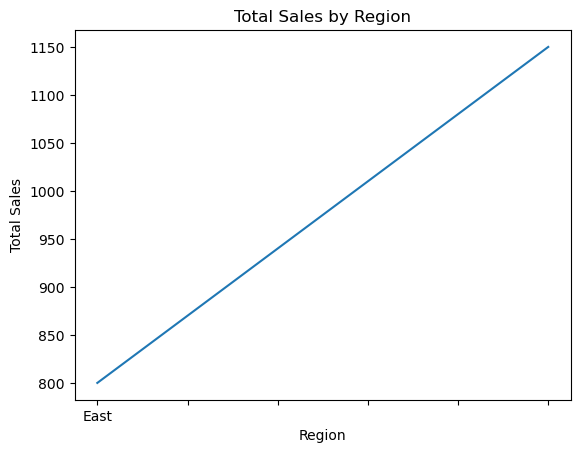

In [36]:
# Example: Create a bar plot of total sales by region

# First, let's get the data we want to plot (we already calculated this!)
region_sales = sales_data.groupby('Region')['Sales'].sum()

print("--- Data to be plotted ---")
print(region_sales)

# Now, let's plot it!
region_sales.plot(kind='line', title='Total Sales by Region', ylabel='Total Sales')

# In Jupyter, the plot appears automatically below the cell. Magic! ✨

In [ ]:
# ASSIGNMENT 2: Line Plot - Total Units per Manager

# First, let's get the data we want to plot (total units per manager)
# manager_total_units = sales_data.groupby('Manager')['Units']....

print("--- Data to be plotted (Total Units) ---")
# print(manager_total_units)

# Now, plot the results as a Line Plot!
# ... .plot(kind='line', title='Total Units Sold by Manager', ylabel='Total Units')

# In Jupyter, the plot appears automatically below the cell.

--- Data to be plotted (Series) ---
Region
East     800
West    1150
Name: Sales, dtype: int64


<Axes: title={'center': 'Bar Plot: Total Sales by Region'}, xlabel='Region', ylabel='Total Sales'>

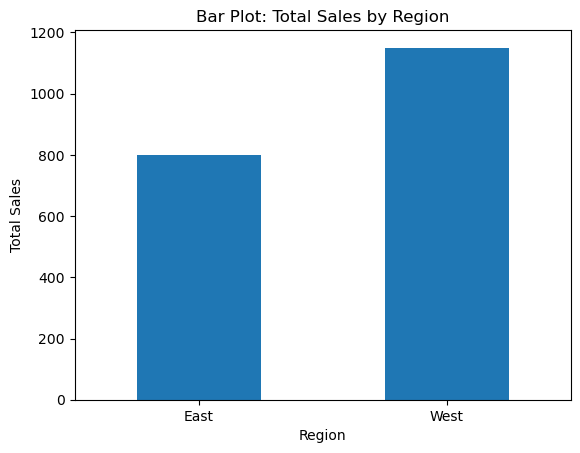

In [38]:
# Example: Create a bar plot of total sales by region

# First, let's get the data we want to plot
region_sales = sales_data.groupby('Region')['Sales'].sum()

print("--- Data to be plotted (Series) ---")
print(region_sales)

# Now, let's plot it using the Series .plot() method!
region_sales.plot(kind='bar', title='Bar Plot: Total Sales by Region', ylabel='Total Sales', rot=0)

# In Jupyter, the plot appears automatically below the cell. Magic! ✨

In [ ]:
# ASSIGNMENT 1: Bar Plot - Average Sales per Manager

# First, let's get the data we want to plot (average sales per manager)
# manager_avg_sales = ...

print("--- Data to be plotted (Average Sales) ---")
# print(manager_avg_sales)

# Now, plot the results as a Bar Plot!
# ... .plot(kind='bar', title='Average Sales per Manager', ylabel='Average Sales', rot=0)

# In Jupyter, the plot appears automatically below the cell.

--- Data to be plotted (Series) ---
Region
East     800
West    1150
Name: Sales, dtype: int64


<Axes: title={'center': 'Area Plot: Total Sales by Region'}, xlabel='Region', ylabel='Total Sales'>

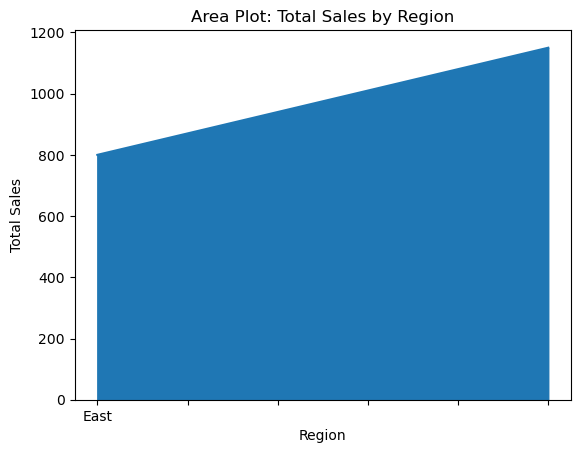

In [39]:
# Example: Create an area plot of total sales by region

# First, let's get the data we want to plot
region_sales = sales_data.groupby('Region')['Sales'].sum()

print("--- Data to be plotted (Series) ---")
print(region_sales)

# Now, let's plot it!
region_sales.plot(kind='area', title='Area Plot: Total Sales by Region', ylabel='Total Sales')

# In Jupyter, the plot appears automatically below the cell. Magic! ✨

In [46]:
# ASSIGNMENT 3: Area Plot - Total Sales per Manager

# First, let's get the data we want to plot (total sales per manager)
# manager_total_sales = sales_data.groupby('Manager')['Sales']....

print("--- Data to be plotted (Total Sales) ---")
# print(manager_total_sales)

# Now, plot the results as an Area Plot!
# ... .plot(kind='area', title='Total Sales by Manager (Area)', ylabel='Total Sales')

# In Jupyter, the plot appears automatically below the cell.

--- Data to be plotted (Total Sales) ---


--- Data to be plotted (Series) ---
Region
East     800
West    1150
Name: Sales, dtype: int64


<Axes: title={'center': 'Pie Plot: Sales Distribution by Region'}>

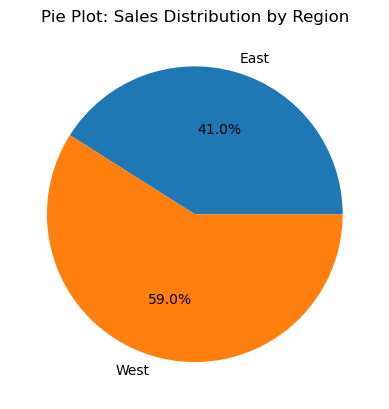

In [40]:
# Example: Create a pie plot of total sales by region

# First, let's get the data we want to plot
region_sales = sales_data.groupby('Region')['Sales'].sum()

print("--- Data to be plotted (Series) ---")
print(region_sales)

# Now, let's plot it!
# The `ylabel=''` removes the Series name from the plot center for a cleaner look.
region_sales.plot(kind='pie', legend=False, autopct='%1.1f%%', title='Pie Plot: Sales Distribution by Region', ylabel='')

# In Jupyter, the plot appears automatically below the cell. Magic! ✨

In [ ]:
# ASSIGNMENT 4: Pie Plot - Sales Contribution by Manager

# First, let's get the data we want to plot (total sales per manager)
# manager_sales_sum = sales_data.groupby('Manager')['Sales']....

print("--- Data to be plotted (Total Sales Sum) ---")
# print(manager_sales_sum)

# Now, plot the results as a Pie Plot!
# ... .plot(kind='pie', autopct='%1.0f%%', title='Sales Contribution by Manager', ylabel='')

# In Jupyter, the plot appears automatically below the cell.

--- Data to be plotted (Column Series) ---
0    250
1    300
2    350
3    400
4    200
5    450
Name: Sales, dtype: int64


<Axes: title={'center': 'Histogram: Sales Frequency'}, ylabel='Frequency'>

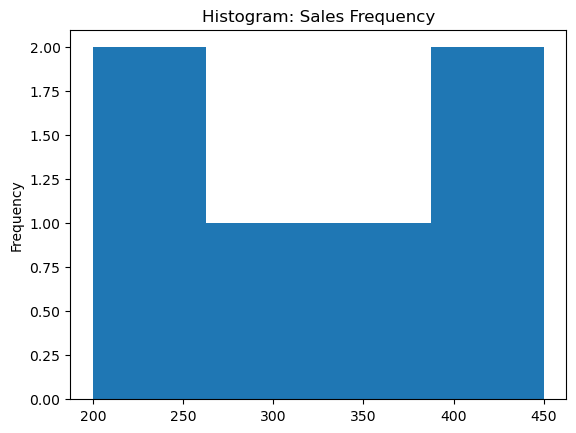

In [41]:
# Example: Create a histogram of the Sales figures

# The data is the 'Sales' column directly from the DataFrame
sales_column = sales_data['Sales']

print("--- Data to be plotted (Column Series) ---")
print(sales_column)

# Now, let's plot it!
sales_column.plot(kind='hist', title='Histogram: Sales Frequency', bins=4)

# In Jupyter, the plot appears automatically below the cell. Magic! ✨

In [ ]:
# ASSIGNMENT 5: Histogram - Distribution of Units Sold

# The data is the 'Units' column directly from the DataFrame
# units_column = sales_data[...]

print("--- Data to be plotted (Units Column) ---")
# print(units_column)

# Now, plot the results as a Histogram! Use bins=3.
# ... .plot(kind='hist', title='Frequency Distribution of Units Sold', bins=3)

# In Jupyter, the plot appears automatically below the cell.

--- Data to be plotted (Column Series) ---
0    250
1    300
2    350
3    400
4    200
5    450
Name: Sales, dtype: int64


<Axes: title={'center': 'KDE/Density Plot: Sales Distribution'}, ylabel='Density'>

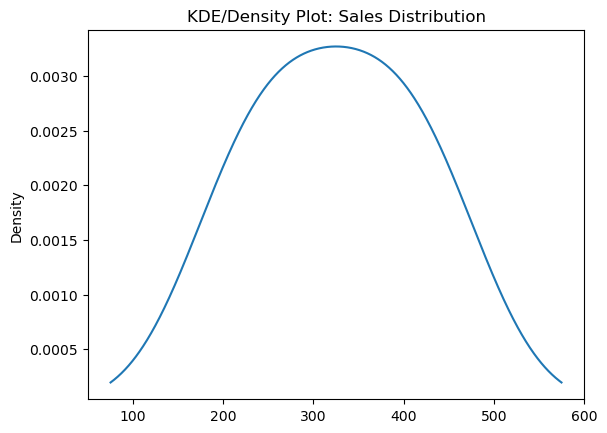

In [42]:
# Example: Create a Density/KDE plot of the Sales distribution

# The data is the 'Sales' column directly from the DataFrame
sales_column = sales_data['Sales']

print("--- Data to be plotted (Column Series) ---")
print(sales_column)

# Now, let's plot it! ('density' and 'kde' are synonyms)
sales_column.plot(kind='kde', title='KDE/Density Plot: Sales Distribution')

# In Jupyter, the plot appears automatically below the cell. Magic! ✨

In [47]:
# ASSIGNMENT 6: Density/KDE Plot - Sales Distribution

# The data is the 'Sales' column directly from the DataFrame
# sales_column = sales_data['Sales']

print("--- Data to be plotted (Sales Column) ---")
# print(sales_column)

# Now, plot the results as a KDE Plot!
# ... .plot(kind='kde', title='Kernel Density Estimate of Sales')

# In Jupyter, the plot appears automatically below the cell.

--- Data to be plotted (Sales Column) ---


--- Data to be plotted (DataFrame) ---
   Units  Sales
0     25    250
1     30    300
2     35    350
3     40    400
4     20    200
5     45    450


<Axes: title={'center': 'Scatter Plot: Sales vs Units'}, xlabel='Units', ylabel='Sales'>

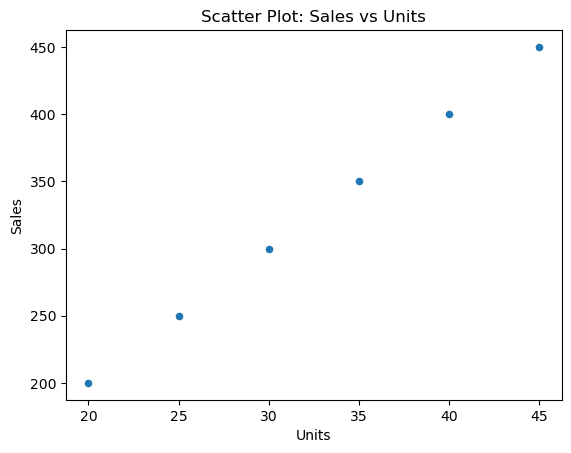

In [43]:
# Example: Create a scatter plot of Units vs. Sales

# The data is the full DataFrame, specifying X and Y columns
df_for_scatter = sales_data[['Units', 'Sales']]

print("--- Data to be plotted (DataFrame) ---")
print(df_for_scatter)

# Now, let's plot it using the DataFrame .plot() method!
sales_data.plot(kind='scatter', x='Units', y='Sales', title='Scatter Plot: Sales vs Units')

# In Jupyter, the plot appears automatically below the cell. Magic! ✨

In [48]:
# ASSIGNMENT 7: Scatter Plot - Sales vs. Units

# The data is the full DataFrame, specifying X and Y columns
df_for_scatter = sales_data[['Units', 'Sales']]

print("--- Data to be plotted (DataFrame) ---")
# print(df_for_scatter)

# Now, plot the results as a Scatter Plot!
# sales_data.plot(kind='scatter', x='Units', y='Sales', title='Relationship: Sales vs. Units')

# In Jupyter, the plot appears automatically below the cell.

--- Data to be plotted (DataFrame) ---


--- Data to be plotted (DataFrame) ---
  Region  Sales
0   East    250
1   West    300
2   East    350
3   West    400
4   East    200
5   West    450


<Axes: title={'center': 'Sales'}, xlabel='Region'>

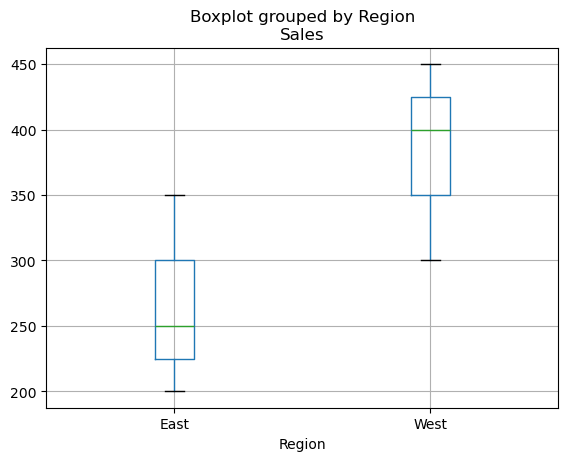

In [44]:
# Example: Create a box plot of Sales grouped by Region

# The data is the full DataFrame, specifying the column and grouping variable
df_for_boxplot = sales_data[['Region', 'Sales']]

print("--- Data to be plotted (DataFrame) ---")
print(df_for_boxplot)

# Now, let's plot it using the DataFrame .boxplot() method!
sales_data.boxplot(column='Sales', by='Region')

# In Jupyter, the plot appears automatically below the cell. Magic! ✨

In [49]:
# ASSIGNMENT 8: Box Plot - Units Distribution by Region

# The data is the full DataFrame, specifying the column and grouping variable
df_for_boxplot = sales_data[['Region', 'Units']]

print("--- Data to be plotted (DataFrame) ---")
# print(df_for_boxplot)

# Now, plot the results using the DataFrame .boxplot() method!
# sales_data.boxplot(column='Units', by='Region')

# In Jupyter, the plot appears automatically below the cell.

--- Data to be plotted (DataFrame) ---


--- Data to be plotted (DataFrame) ---
   Units  Sales
0     25    250
1     30    300
2     35    350
3     40    400
4     20    200
5     45    450


<Axes: title={'center': 'Hexbin Plot: Sales vs Units'}, xlabel='Units', ylabel='Sales'>

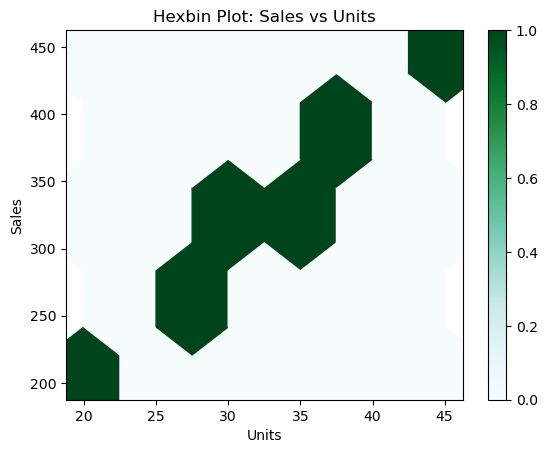

In [45]:
# Example: Create a hexbin plot of Units vs. Sales

# The data is the full DataFrame, specifying X and Y columns
df_for_hexbin = sales_data[['Units', 'Sales']]

print("--- Data to be plotted (DataFrame) ---")
print(df_for_hexbin)

# Now, let's plot it! (gridsize controls the number of hexagonal bins)
sales_data.plot(kind='hexbin', x='Units', y='Sales', gridsize=5, title='Hexbin Plot: Sales vs Units')

# In Jupyter, the plot appears automatically below the cell. Magic! ✨

In [50]:
# ASSIGNMENT 9: Hexbin Plot - Density of Sales vs. Units

# The data is the full DataFrame, specifying X and Y columns
df_for_hexbin = sales_data[['Units', 'Sales']]

print("--- Data to be plotted (DataFrame) ---")
# print(df_for_hexbin)

# Now, plot the results as a Hexbin Plot! (Use gridsize=4)
# sales_data.plot(kind='hexbin', x='Units', y='Sales', gridsize=4, title='Density: Sales vs Units')

# In Jupyter, the plot appears automatically below the cell.

--- Data to be plotted (DataFrame) ---


### 🧠 Practice Task: Visualize Manager Sales

In an earlier exercise, you calculated the average sales per manager. Now, create a horizontal bar plot (`kind='barh'`) to visualize those results. A horizontal bar chart can be easier to read when you have long labels.

In [ ]:
# Your code here!
# 1. Calculate the average sales per manager
manager_avg_sales = sales_data.groupby('Manager')['Sales'].mean()

# 2. Create a horizontal bar plot
# manager_avg_sales.plot(...)


--- 
## Topic 6: Saving Your Data with `.to_csv()`

📄 **Explanation**

After all your hard work cleaning and analyzing, you'll want to save the results! The `.to_csv()` method lets you save a DataFrame to a comma-separated values (CSV) file, which is a universal format that can be opened by almost any data software (like Excel, Google Sheets, etc.).

💡 **Pro-Tip**: Use `index=False` to prevent Pandas from writing the DataFrame index (those numbers on the far left) as a column in your file. You usually don't need it.

In [32]:
# Example: Save our region_sales summary to a CSV file

# Let's re-calculate our summary of sales by region
region_sales_summary = sales_data.groupby('Region')['Sales'].sum().reset_index() # .reset_index() turns the grouped output back into a DataFrame

# Save it to a file named 'region_sales_summary.csv'
region_sales_summary.to_csv('region_sales_summary.csv', index=False)

print("✅ Saved 'region_sales_summary.csv' to disk!")
print("Check the file explorer on the left to see your new file.")

✅ Saved 'region_sales_summary.csv' to disk!
Check the file explorer on the left to see your new file.


### 🧠 Practice Task: Save Employee Data

Remember the `employee_depts` DataFrame we created by merging? Save that DataFrame to a new file called `employee_report.csv`. Don't forget to set `index=False`!

In [ ]:
# Your code here!
# employee_depts.to_csv( ... )

print("File saved! Well done.")


--- 
# 🎉 Final Revision Assignment 🎉

Congratulations! You've learned the fundamentals of combining, grouping, visualizing, and saving data with Pandas. Now it's time to put all your new skills together.

**Scenario**: You are a data analyst for a small online store. You have two datasets: one for products and one for recent sales. Your task is to analyze the sales performance.

---

### 🎯 Your Tasks:

**1. Create the DataFrames**:
   - Run the code cell below to create a `products` DataFrame and a `sales` DataFrame.

**2. Merge the Data**:
   - Merge the `sales` DataFrame with the `products` DataFrame to include the `product_name` and `price` for each transaction. Call the new DataFrame `full_sales_data`.

**3. Create a Revenue Column**:
   - In `full_sales_data`, create a new column called `Revenue` which is the `quantity` sold multiplied by the `price`.

**4. Group and Analyze**:
   - Group `full_sales_data` by `product_name` and calculate the total `Revenue` for each product. Store this in a new variable called `product_revenue`.

**5. Categorize Products by Price**:
   - In the `products` DataFrame, create a new column `price_category` using `pd.cut`. The categories should be 'Cheap' (0-20), 'Mid-Range' (21-100), and 'Expensive' (>100).

**6. Visualize Your Findings**:
   - Create a bar plot for `product_revenue` to show which product is generating the most revenue.

**7. Save Your Final Report**:
   - Save the `full_sales_data` DataFrame to a CSV file named `final_sales_report.csv`.

In [ ]:
# Task 1: Run this cell to create your data
products = pd.DataFrame({
    'product_id': [1, 2, 3, 4],
    'product_name': ['Laptop', 'Mouse', 'Keyboard', 'Monitor'],
    'price': [1200, 25, 75, 300]
})

sales = pd.DataFrame({
    'transaction_id': range(101, 107),
    'product_id': [3, 1, 2, 4, 1, 3],
    'quantity': [2, 1, 3, 2, 1, 1]
})

print("--- Products ---")
print(products)
print("\n--- Sales ---")
print(sales)

# --- Your Code Below --- 

# Task 2: Merge the data


# Task 3: Create a Revenue column


# Task 4: Group and analyze


# Task 5: Categorize products


# Task 6: Visualize


# Task 7: Save your report
